In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Dict, Optional, Tuple

def plot_correlation(a, b, x_label=None, y_label=None, exclude_first=True, 
                     method='pearson', title='Correlation Plot'):
    """
    Plot correlation between two lists with options to exclude first items
    and custom axis labels.
    
    Parameters:
    -----------
    a : list or array-like
        First list of values
    b : list or array-like
        Second list of values (must be same length as a)
    x_label : str, default=None
        Custom label for x-axis (uses 'Values from List A' if None)
    y_label : str, default=None
        Custom label for y-axis (uses 'Values from List B' if None)
    exclude_first : bool, default=True
        Whether to exclude the first element of both lists
    method : str, default='pearson'
        Correlation method ('pearson', 'spearman', or 'kendall')
    title : str, default='Correlation Plot'
        Title for the plot
        
    Returns:
    --------
    correlation_value : float
        The calculated correlation coefficient
    """
    # Check if lists have same length
    if len(a) != len(b):
        raise ValueError("Lists must have the same length")
    
    # Exclude first elements if specified
    if exclude_first:
        a_filtered = a[1:]
        b_filtered = b[1:]
    else:
        a_filtered = a
        b_filtered = b
    
    # Set default labels if not provided
    if x_label is None:
        x_label = 'Values from List A'
    if y_label is None:
        y_label = 'Values from List B'
    
    # Create DataFrame
    data = pd.DataFrame({
        'A': a_filtered,
        'B': b_filtered
    })
    
    # Calculate correlation
    correlation = data.corr(method=method).iloc[0, 1]
    
    # Create figure
    plt.figure(figsize=(10, 8))
    
    # Create scatter plot with regression line
    sns.regplot(x='A', y='B', data=data, scatter_kws={'alpha': 0.6})
    
    # Add correlation value to plot
    plt.annotate(f"{method.capitalize()} correlation: {correlation:.4f}",
                xy=(0.05, 0.95), xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    # Add labels and title
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True, linestyle='--', alpha=0.3)
    
    return correlation

In [3]:
def plot_correlation(
    a:List[float],
    b:List[float],
    x_label:str="",
    y_label:str="",
    skip:int=1,
    method="pearson",
    title="Correlation Plot"
    ):
    if len(a) != len(b):
        raise ValueError("Lists must have the same length!")
    
    a = a[skip:]
    b = b[skip:]

    if not x_label:
        x_label = "List A"
    if not y_label:
        y_label = "List B"

    data = pd.DataFrame({'A': a, 'B': b})
    correlation = data.corr(method=method).iloc[0,1]

    plt.figure(figsize=(10,8))
    sns.regplot(x="A", y="B", data=data, scatter_kws={'alpha':0.6})

    # Add correlation value to plot
    plt.annotate(f"{method.capitalize()} correlation: {correlation:.4f}",
                xy=(0.05, 0.95), xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    # Add labels and title
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True, linestyle='--', alpha=0.3)
    
    return correlation

Correlation coefficient: 0.9972517204736322


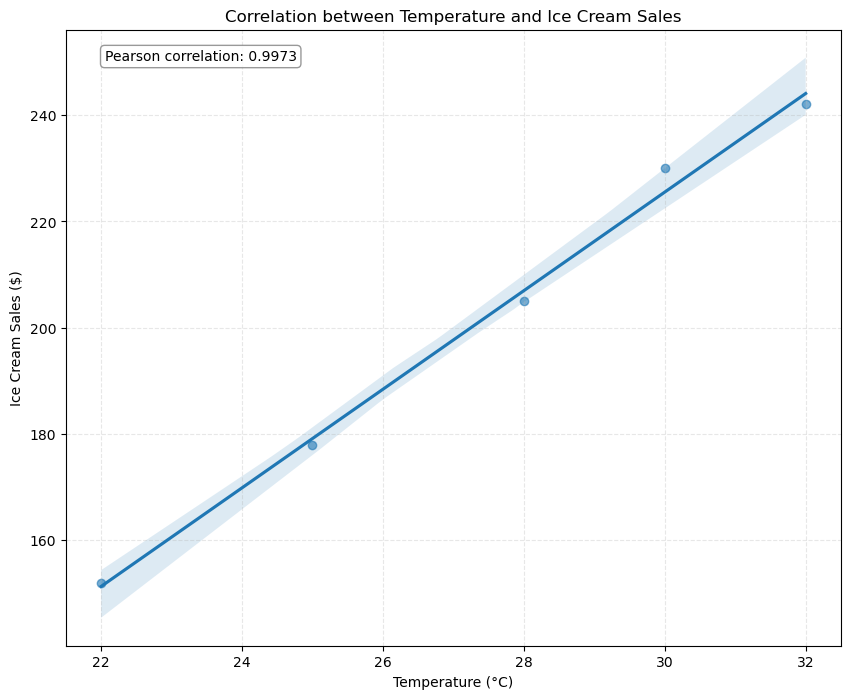

In [5]:
# Example usage
temperatures = [20, 22, 25, 28, 30, 32]
ice_cream_sales = [145, 152, 178, 205, 230, 242]

correlation = plot_correlation(
    temperatures, 
    ice_cream_sales,
    x_label='Temperature (°C)',
    y_label='Ice Cream Sales ($)',
    title='Correlation between Temperature and Ice Cream Sales',
)

print(f"Correlation coefficient: {correlation}")

plt.show()

In [6]:
data = pd.DataFrame({
        'A': temperatures,
        'B': ice_cream_sales
    })
    
# Calculate correlation
correlation = data.corr(method='pearson')
correlation

,A,B
A,1.000000,0.993668
B,0.993668,1.000000
